# Real world Data

## Data source 

Basically, the dataset tree is the following:

- Region
    - Country
        - Industry
            - Client 
                - Products
                
## Variables name

|  Variable name        |  Type   |
| --------------------- | ------- |
| ID                    |  object |
| Country_name          | object  |
| country_ref           | object  |
| Region                | object  |
| industry              | object  |
| A_reference           | float64 |
| A_market              | float64 |
| B_reference           | float64 |
| B_market              | float64 |
| C_reference           | float64 |
| C_market              | float64 |
| D_reference           | float64 |
| D_market              | float64 |
| E_reference           | float64 |
| E_market              | float64 |
| Total_reference       | float64 |
| Total_market          | float64 |

Note that, the market includes the reference

In [19]:
import pandas as pd
import plotly.express as px
import numpy as np

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

In [20]:
df_final = pd.read_csv("dataPandasClass.gz")
df_final.head()

,ID,Country_name,country_ref,Region,industry,A_reference,A_market,B_reference,B_market,C_reference,C_market,D_reference,D_market,E_reference,E_market,Total_reference,Total_market
0,Customer 620,Australia,AUS,Asia Pacific,A,0.0,0.007258,0.0,0.010424,0.0,0.021051,0.0,0.001752,0.0,0.005433,0.0,0.021454
1,Customer 1070,Australia,AUS,Asia Pacific,A,0.0,0.009222,0.0,0.018054,0.0,0.021051,0.0,0.009690,0.0,0.008571,0.0,0.023859
2,Customer 25,Australia,AUS,Asia Pacific,A,0.0,0.012397,0.0,0.012396,0.0,0.002533,0.0,0.007179,0.0,0.005884,0.0,0.015037
3,Customer 370,Australia,AUS,Asia Pacific,B,0.0,0.012402,0.0,0.032244,0.0,0.009523,0.0,0.016637,0.0,0.016271,0.0,0.033501
4,Customer 597,Australia,AUS,Asia Pacific,C,0.0,0.014409,0.0,0.015047,0.0,0.010695,0.0,0.009601,0.0,0.010526,0.0,0.018923


## Objectives

In this notebook, you need to:

- Print the country name by region
- Compute the market size for the reference by:
    - Product
    - Industry
    - Region
- Industry Market size by product
- Region Market size by product
- Region Market size by industry

For all the above computation compute the market share of `reference`

- Remove Region-industry with no revenue
- Compute Euclidean Distance by Region-industry-product
- Filter the data by Region-industry-product

**the market share :Revenue to potential**

$$\text{Market share} = \sum  \text{Revenue Reference} / \sum \text{Total Market} $$

## Parameters

In [21]:
reference = [
    "A_reference",
    "B_reference",
    "C_reference",
    "D_reference",
    "E_reference",
]
market = [
    "A_market",
    "B_market",
    "C_market",
    "D_market",
    "E_market",
]

## List country by region

In [22]:
for c in df['Region'].sort_values().unique():

    countries = df_final[df_final['Region'].isin(
        [c])]['Country_name'].unique()

    print('\n Region name {} \n {}'.format(c, countries))


 Region name Americas 
 ['United States' 'Mexico' 'Venezuela' 'Brazil' 'Argentina' 'Canada' 'Peru'
 'Colombia' 'Uruguay' 'Chile' 'Ecuador' 'Paraguay' 'Trinidad and Tobago'
 'Bahamas' 'Jamaica' 'Panama' 'Armenia' 'Bolivia' 'Martinique' 'Guatemala'
 'Honduras']

 Region name Asia Pacific 
 ['Australia' 'new Zealand' 'Japan' 'China' 'India' 'Indonesia' 'Pakistan'
 'Singapore' 'Vietnam' 'Philippines' 'Hong Kong' 'Korea' 'Thailand'
 'Malaysia' 'Taiwan' 'Kazakhstan' 'Bangladesh' 'Macao' 'Sri Lanka'
 'Kiribati']

 Region name Central Europe 
 ['Germany' 'Czech' 'Hungary' 'Poland' 'Slovak Republic' 'Romania'
 'Lithuania' 'Estonia' 'Switzerland' 'Austria' 'The Russian Federation'
 'Slovenia' 'Bulgaria' 'Ukraine' 'Croatia' 'Latvia' 'Montenegro'
 'Federal Republic of Yugoslavia' 'Belarus' 'Georgia' 'Moldova']

 Region name Middle East & Africa 
 ['Ghana' 'South Africa' 'Tanzania' 'Kenya' 'Egypt' 'Mozambique' 'Congo'
 'Qatar' 'Lesotho' 'Saudi Arabia' 'Kuwait' 'Nigeria' 'Costa Rica' 'Mali'
 'Unite

# Top level

## Product Market size

In [23]:
(df_final[reference + market]
 .sum(axis = 0)
 .reset_index(name = 'sum_product')
 .assign(origin = lambda x: x['index'].str.extract(r"(_[^_]+$)"),
        product = lambda x: x['index'].str.extract(r"(^[^_]+(?=_))"))
 .drop(columns = 'index')
 .sort_values(by = "product")
 .set_index(['product', 'origin'])
 .unstack(level = 1)
 .assign(Revenue_to_potential = lambda x: x.iloc[:, 1] / x.iloc[:, 0])
 .sort_values(by = 'Revenue_to_potential')
 .style
 .bar(subset=['Revenue_to_potential'], color='#d65f5f')
 .format("{:.2%}", subset=['Revenue_to_potential'])
)

## Industry Market size

In [29]:
(df_final
 .groupby('industry').agg(
     {
         'Total_reference': 'sum',
         'Total_market': 'sum'})
 .assign(revenue_to_potential = lambda x:
         x['Total_reference']/ x['Total_market'])
 .sort_values(by = 'revenue_to_potential')
 .style
 .bar(subset=['revenue_to_potential'], color='#d65f5f')
 .format("{:.2%}", subset=['revenue_to_potential'])
          )

,Total_reference,Total_market,revenue_to_potential
industry,,,
P,0,0.039431,0.00%
R,0.143765,2.72027,5.28%
J,4.27868,28.1474,15.20%
D,1.8764,11.846,15.84%
Q,0.0476717,0.297216,16.04%
E,12.5538,75.4826,16.63%
B,4.35818,24.7767,17.59%
C,6.19059,34.6936,17.84%
I,1.98264,11.0331,17.97%


## Region Market size

In [31]:
(df_final
 .groupby('Region').agg(
     {
         'Total_reference': 'sum',
         'Total_market': 'sum'})
 .assign(revenue_to_potential = lambda x: x['Total_reference']/ x['Total_market'])
 .sort_values(by = 'revenue_to_potential')
 .style
 .format({'revenue_to_potential': "{:.2%}"})
 .bar(subset=['revenue_to_potential'], color='#d65f5f')
 )

,Total_reference,Total_market,revenue_to_potential
Region,,,
Americas,0.637751,48.3736,1.32%
Asia Pacific,3.52503,68.3147,5.16%
Northern Europe,11.8137,99.4687,11.88%
Central Europe,18.3242,80.4991,22.76%
Middle East & Africa,10.7538,28.8115,37.32%
Southern Europe,22.4471,52.6215,42.66%


# Next level

## Industry Market size by product

In [32]:
(df_final[['industry'] + reference + market]
 .groupby('industry')
 .sum(axis = 0)
 .transpose()
 .reset_index()
 .assign(origin = lambda x: x['index'].str.extract(r"(_[^_]+$)"),
        product = lambda x: x['index'].str.extract(r"(^[^_]+(?=_))"))
 .drop(columns = 'index')
 .sort_values(by = "product")
 .set_index(['product', 'origin'])
 .groupby(level = 0)
 .apply(lambda x: x.shift(1) / x )
 .dropna()
 .droplevel('origin')
 .transpose()
 .assign(total_industry = lambda x: x.sum(1))
 .sort_values(by ='total_industry')
 .drop(columns = 'total_industry')
 .style
 .format("{:.2%}")
 .background_gradient(cmap=cm)
)

product,A,B,C,D,E
industry,,,,,
P,0.00%,0.00%,0.00%,0.00%,0.00%
R,1.83%,0.43%,1.81%,20.50%,5.60%
Q,12.88%,5.38%,0.00%,20.22%,0.00%
N,12.09%,0.14%,1.17%,31.77%,0.62%
I,11.67%,0.83%,3.06%,42.59%,2.25%
D,9.82%,1.68%,1.87%,44.55%,7.52%
J,7.82%,0.79%,4.35%,48.59%,4.57%
C,10.53%,1.30%,4.72%,46.56%,4.38%
K,11.13%,1.55%,5.74%,49.52%,1.38%


## Region Market size by industry

In [33]:
ttpotential_i = (df_final
 .groupby('industry').agg(
     {
         'Total_market': 'sum'})
            )
ttpotential_i.head()

,Total_market
industry,
A,64.331169
B,24.776657
C,34.693586
D,11.845960
E,75.482642


In [35]:
revenue_ci = (df_final
 .groupby(['Region', 'industry']).agg(
     {
         'Total_reference': 'sum'}
 )
)

In [39]:
region = df_final['Region'].unique()

In [40]:
(
    revenue_ci.reset_index()
    .merge(ttpotential_i.reset_index(), on="industry", how="inner")
    .assign(
        revenue_to_potential=lambda x: x["Total_reference"] / x["Total_market"]
    )
    .sort_values(by=["Region", "revenue_to_potential"], ascending=[True, False])
    .drop(columns=["Total_reference", "Total_market"])
    .pivot(index="industry", columns="Region", values="revenue_to_potential")
    .assign(total_industry = lambda x: x.sum(1))
    .sort_values(by ='total_industry')
    .fillna(0)
    .style
    .highlight_null('red')
    .background_gradient(cmap=cm,
                      subset = region)
    .bar(subset=['total_industry'], color='#d65f5f')
)

Region,Americas,Asia Pacific,Central Europe,Middle East & Africa,Northern Europe,Southern Europe,total_industry
industry,,,,,,,
P,0,0,0,0,0,0,0
R,0.00368841,0,0.0225567,0,0.0225215,0.00408273,0.0528493
J,0.000774327,0.00507096,0.0555336,0.0160381,0.0197016,0.0548912,0.15201
D,0,0.00687376,0.0357059,0.026752,0.0395393,0.0495288,0.1584
Q,0,0.0798122,0,0.0805821,0,0,0.160394
E,0.00200383,0.00684502,0.0528505,0.0225591,0.0256416,0.0564141,0.166314
B,0.00265937,0.00470107,0.0457041,0.0337493,0.0315336,0.0575514,0.175899
C,0.00364434,0.0134079,0.046189,0.0291757,0.0370829,0.0489364,0.178436
I,0,0.0107985,0.0400193,0.0334664,0.0337595,0.0616557,0.179699


## Correlation

In [41]:
df_final.corr()

,A_reference,A_market,B_reference,B_market,C_reference,C_market,D_reference,D_market,E_reference,E_market,Total_reference,Total_market
A_reference,1.000000,0.087178,0.330087,0.130892,0.330556,0.109468,0.631820,0.420246,0.368768,0.269260,0.779118,0.158228
A_market,0.087178,1.000000,0.088715,0.499642,0.093021,0.646753,0.001051,0.276680,0.150815,0.125089,0.042946,0.939258
B_reference,0.330087,0.088715,1.000000,0.085470,0.154470,0.089182,0.209783,0.166752,0.336633,0.109712,0.323019,0.109528
B_market,0.130892,0.499642,0.085470,1.000000,0.054497,0.467587,0.109901,0.385397,0.193725,0.353912,0.151620,0.688987
C_reference,0.330556,0.093021,0.154470,0.054497,1.000000,0.036106,0.349062,0.206680,0.154139,0.133125,0.436719,0.115855
C_market,0.109468,0.646753,0.089182,0.467587,0.036106,1.000000,0.057683,0.319764,0.139147,0.355479,0.096544,0.751823
D_reference,0.631820,0.001051,0.209783,0.109901,0.349062,0.057683,1.000000,0.513130,0.264181,0.364093,0.936069,0.085419
D_market,0.420246,0.276680,0.166752,0.385397,0.206680,0.319764,0.513130,1.000000,0.237728,0.499243,0.528695,0.402808
E_reference,0.368768,0.150815,0.336633,0.193725,0.154139,0.139147,0.264181,0.237728,1.000000,0.146743,0.373702,0.187222
E_market,0.269260,0.125089,0.109712,0.353912,0.133125,0.355479,0.364093,0.499243,0.146743,1.000000,0.369984,0.321323


## Euclidean Distance

## Definition Euclidean Distance

According to the Euclidean distance formula, the distance between two points in the plane with coordinates (x, y), and is given by:

$$\begin{aligned} d(\mathbf{p}, \mathbf{q})=d(\mathbf{q}, \mathbf{p}) &=\sqrt{\left(q_{1}-p_{1}\right)^{2}+\left(q_{2}-p_{2}\right)^{2}+\cdots+\left(q_{n}-p_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(q_{i}-p_{i}\right)^{2}} \end{aligned}$$

### Example 

Calculate the distance between two arrays.

We want to sum each column of the first array with all the columns of the second array

Take an example, we want to compute the Euclidean distance of this first array:
- [7.2, 3.6, 5.1, 2.5]: It has 4 columns and one row

we will compute the Euclidean distance with all the rows of the second array. The second array has also four columns. We are substracting each columns of the first and second array respecively 

Exemple with the first rows of the second array:
- [5.1, 3.5, 1.4, 0.2]

The Euclidean distance is $$\sqrt{((7.2 - 5.1)^2  + (3.6 - 3.5)^2 + (5.1 -1.4)^2 + (2.5 - 0.2)^2)}$$

We repeat for all the rows

## Data standardization

The value of distance measures is intimately related to the scale on which measurements are made.

In [54]:
def euclideanDistance(vect_1, vect_2):
  
    """
      Compute the Euclidean distance 
    """
  
    sum_ = np.sum(np.power(vect_1 - vect_2, 2))
  
    euclideanD = np.sqrt(sum_)
    return euclideanD

Remove country industry pair with no remove.It will inflate the distance

In [43]:
indu_norevenue = (df_final
 .groupby(['Region', 'industry'])
 .agg(
     {
         'Total_reference': 'sum'}
 )
 .loc[lambda x: x['Total_reference'] == 0]
)
indu_norevenue

Total_reference
Region               industry                 
Americas             D                     0.0
                     I                     0.0
                     K                     0.0
                     N                     0.0
                     Q                     0.0
Asia Pacific         R                     0.0
Central Europe       Q                     0.0
Middle East & Africa P                     0.0
Northern Europe      Q                     0.0
Southern Europe      Q                     0.0

In [44]:
list_ = list(indu_norevenue.index)
list_[0][0]

'Americas'

In [46]:
index_no = [] 
for c in  list_:
    index_ =  df_final[(df_final['Region'] == c[0]) &
          (df_final['industry'] == c[1])
          ].index
    index_no.extend(index_)

In [47]:
X = df_final[~df_final.index.isin(index_no)]

In [55]:
def compute_potential(df, normalized=True, begin=0, end=10):
    """
    The fonction compute the Euclidean Distance
    Merge the whitespace 
    and plot the results: selected points and whitespace
    """

    # Normal

    # Reshape the data
    region_indu_prod = (df[['Region', 'industry'] + reference + market]
                        .groupby(['Region', 'industry'])
                        .sum(axis=0)
                        .stack()
                        .reset_index(name='sum')
                        .assign(origin=lambda x: x['level_2'].str.extract(
                            r"(_[^_]+$)"),
                                product=lambda x: x['level_2'].str.extract(
                                    r"(^[^_]+(?=_))"))
                        .drop(columns='level_2')
                        .set_index(['Region', 'industry', 'product', 'origin'
                                    ])
                        .unstack()
                        .assign(norm_pot=lambda x:  (x.iloc[:, 0] -
                                                     x.iloc[:, 0].mean())/
                                x.iloc[:, 0].std(),
                                norm_vod=lambda x:  (
                                x.iloc[:, 1] - x.iloc[:, 1].mean())/
                                x.iloc[:, 1].std(),
                                )
                        )

    # Create distance
    if normalized:
        x_ = 2
        y_ = 3
    else:
        x_ = 0
        y_ = 1

    region_indu_prod["distance"] = region_indu_prod.groupby(
        #['Inbound_Region', 'str']
        level=[0, 1]
    ).apply(lambda x: euclideanDistance(x.iloc[:, x_],
                                        x.iloc[:, y_],
                                        )
            )

    ### Compute whitesaoce
    whitespace_ri = (
        region_indu_prod
        .iloc[:, :2]
        .droplevel('product')
        .groupby(level=[0, 1])
        .sum()
        .assign(whitespace=lambda x: x.iloc[:, 0] - x.iloc[:, 1])
        .iloc[:, -1]
    )

    sort_distance = (region_indu_prod
                     .droplevel(level=[2])
                     .iloc[:, -1]
                     .drop_duplicates()
                     )
    df_Epotential = pd.concat(
        [sort_distance, whitespace_ri], axis=1).sort_values(by='distance')
    
    title = 'Top {} markets: Whitespace according to \
    Euclidean Distance'.format(end - begin)

    df_Epotential.iloc[begin:end, 1].plot.barh(
        title=title)

    return region_indu_prod, df_Epotential

In [50]:
def filter_distance(df, country, industry):
    """
    filter the multi-index dataframe
    and return country industry
    """
    return df.loc[(country,industry)]

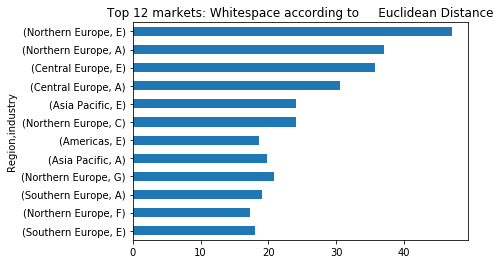

In [56]:
df_Epotential = compute_potential(
    df = X,
    normalized =  False,
                  begin = 80,
                  end = 92)

In [57]:
filter_distance(df =df_Epotential[0],
                country = 'Americas',
                industry = 'E')

sum             norm_pot  norm_vod   distance
origin    _market _reference                               
product                                                    
A        8.910078   0.041393  3.096411 -0.369097  11.273979
B        5.681961   0.000000  1.681386 -0.456236  11.273979
C        4.125439   0.105148  0.999095 -0.234881  11.273979
D        0.031156   0.014482 -0.795608 -0.425749  11.273979
E        0.038108   0.001665 -0.792561 -0.452730  11.273979